In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(42)

In [87]:
# nomial model
model = hmm.GaussianHMM(n_components = 2, covariance_type = "full")
model.n_features = 1
model.startprob_ = np.array([0.75, 0.25])
model.transmat_ = np.array([[0.25, 0.75],
                            [0.25, 0.75]])
model.means_ = np.array([[2.0], [0.0]])
model.covars_ = np.array([[[0.0625]],
                         [[0.0625]]])

In [88]:
# store the model parameters

my_file = open("./Model_Parameters/N_Components.txt", "w")
my_file.write(str(model.n_components))
my_file.close()

my_file = open("./Model_Parameters/Initial_Probability_Matrix.txt", "w")
np.savetxt(my_file, model.startprob_)
my_file.close()

my_file = open("./Model_Parameters/Transition_Probability_Matrix.txt", "w")
for row in model.transmat_:
    np.savetxt(my_file, row)
my_file.close()

my_file = open("./Model_Parameters/Expectancy_Matrix.txt", "w")
for row in model.means_:
    np.savetxt(my_file, row)
my_file.close()

my_file = open("./Model_Parameters/Std_Variance_Matrix.txt", "w")
for row in model.covars_:
    np.savetxt(my_file, row)
my_file.close()

In [145]:
# generate the nomial dataset
# the nomial dataset is just the samples generated by the model
n_samples = 5
n_nomial = 5
X_temp, Z = model.sample(n_samples = n_samples, random_state = 13)
X_test_data_nomial = [X_temp]
X_test_label_nomial = [0]
# Generate samples
for i in range(n_nomial - 1):
    X_temp, Z = model.sample(n_samples = n_samples, random_state = i * 17)
    X_test_data_nomial = np.concatenate([X_test_data_nomial, [X_temp]])
    X_test_label_nomial = np.concatenate([X_test_label_nomial, [0]])

In [146]:
# abnormal model
model_anomaly = hmm.GaussianHMM(n_components = 2, covariance_type = "full")
model_anomaly.n_features = 1
model_anomaly.startprob_ = np.array([0.75, 0.25])
model_anomaly.transmat_ = np.array([[0.25, 0.75],
                            [0.25, 0.75]])
model_anomaly.means_ = np.array([[1.0], [0.0]])
model_anomaly.covars_ = np.array([[[0.0625]],
                         [[0.0625]]])

In [147]:
# generate the abnormal dataset
# the anomaly dataset is the dataset generated by a slightly different model
anomaly_portion = 1
n_anomaly = int(anomaly_portion * n_nomial // 1)
X_temp, Z = model_anomaly.sample(n_samples = n_samples, random_state = 17)
X_test_data_anomaly = [X_temp]
X_test_label_anomaly = [1]
# Generate samples
for i in range(n_anomaly - 1):
    X_temp, Z = model_anomaly.sample(n_samples = n_samples, random_state = i * 19)
    X_test_data_anomaly = np.concatenate([X_test_data_anomaly, [X_temp]])
    X_test_label_anomaly = np.concatenate([X_test_label_anomaly, [1]])

In [174]:
# write the samples to file
my_file = open("./dataset/Test_anomaly_set_array.txt", "w")
for row in X_test_data_nomial:
    np.savetxt(my_file, row)
for row in X_test_data_anomaly:
    np.savetxt(my_file, row)
my_file.close()
# Test_anomaly_set_array.txt is the file stores the data array

my_file = open("./dataset/Test_anomaly_set_array_size.txt", "w")
my_file.write(str(n_nomial * n_samples + n_anomaly * n_samples))
my_file.close()
# Test_anomaly_set_array_size.txt is the file stores the size of data array

my_file = open("./dataset/Test_anomaly_set_length.txt", "w")
for row in X_test_data_nomial:
    my_file.write(str(len(row)) + '\n')
for row in X_test_data_anomaly:
    my_file.write(str(len(row)) + '\n')
my_file.close()
# Test_anomaly_set_length.txt is the file stores the length array (length of each samples)

my_file = open("./dataset/Test_anomaly_set_samples.txt", "w")
my_file.write(str(len(X_test_data_nomial) + len(X_test_data_anomaly)) + '\n')
my_file.close()
# Test_anomaly_set_samples.txt is the file stores the number of samples

my_file = open("./dataset/Test_anomaly_set_label.txt", "w")
for element in X_test_label_nomial:
    my_file.write(str(int(element)) + '\n')
for element in X_test_label_anomaly:
    my_file.write(str(int(element)) + '\n')
my_file.close()
# Test_anomaly_set_label.txt is the file stores the labels of samples

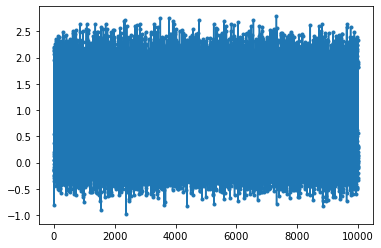

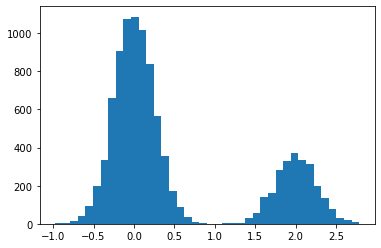

In [92]:
# graph the model-generated observations
# just for illustration, this block of code has no other use
X, Z = model.sample(n_samples = 10000, random_state = 13)
plt.plot(X[:], ".-")
plt.show()
_ = plt.hist(X, bins = 'auto')
plt.show()

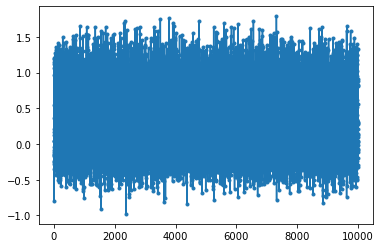

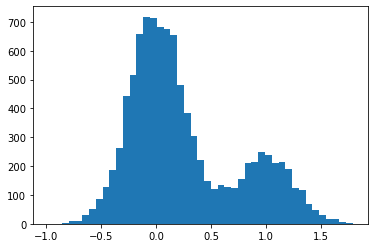

In [93]:
# graph the anomaly-model-generated observations
# just for illustration, this block of code has no other use
# also note that, the histogram shown here is not the histogram for each observation sequence
X, Z = model_anomaly.sample(n_samples = 10000, random_state = 13)
plt.plot(X[:], ".-")
plt.show()
_ = plt.hist(X, bins = 'auto')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

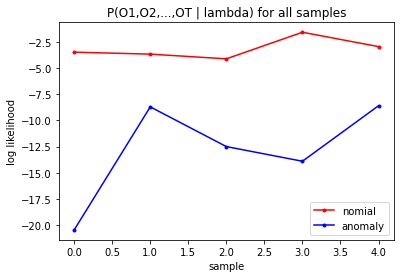

In [152]:
# Plot the log likelihood for each sample sequence
score_nomial = [model.score(X_test_data_nomial[0])]
for i in range(n_nomial - 1):
    score_nomial = np.concatenate([score_nomial, [model.score(X_test_data_nomial[i + 1])]])
plt.plot(score_nomial[:], ".-", label="nomial", color = 'r')

score_anomaly = [model.score(X_test_data_anomaly[0])]
for i in range(n_anomaly - 1):
    score_anomaly = np.concatenate([score_anomaly, [model.score(X_test_data_anomaly[i + 1])]])
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'b')   

plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O1,O2,...,OT | lambda) for all samples")
plt.legend()

plt.show

In [18]:
# store the LogP
my_file = open("./Result/LogP.txt", "w")
np.savetxt(my_file, score_nomial)
np.savetxt(my_file, score_anomaly)
my_file.close()

In [15]:
# train a new model
model_fit = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model_fit.fit(X_test_data_nomial.reshape(-1,1), lengths = [len(X_test_data_nomial[i]) for i in range(np.size(X_test_data_nomial,0))])
print("\pi:")
print(model_fit.startprob_)
print("A:")
print(model_fit.transmat_)
print("\expectancy:")
print(model.means_)
print("\standard deviation:")
print(model.covars_)

\pi:
[0.47912059 0.52087941]
A:
[[0.31741323 0.68258677]
 [0.30102698 0.69897302]]
\mu:
[[0.]
 [5.]]
\Sigma:
[[[1.]]

 [[1.]]]


<function matplotlib.pyplot.show(close=None, block=None)>

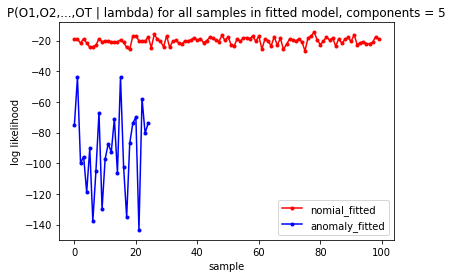

In [16]:
# Plot the log likelihood for the new model
score_nomial_fit = [model_fit.score(X_test_data_nomial[0])]
for i in range(n_nomial - 1):
    score_nomial_fit = np.concatenate([score_nomial_fit, [model_fit.score(X_test_data_nomial[i + 1])]])
plt.plot(score_nomial_fit[:], ".-", label="nomial_fitted", color = 'r')

score_anomaly_fit = [model_fit.score(X_test_data_anomaly[0])]
for i in range(n_anomaly - 1):
    score_anomaly_fit = np.concatenate([score_anomaly_fit, [model_fit.score(X_test_data_anomaly[i + 1])]])
plt.plot(score_anomaly_fit[:], ".-", label="anomaly_fitted", color = 'b')   
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 5")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

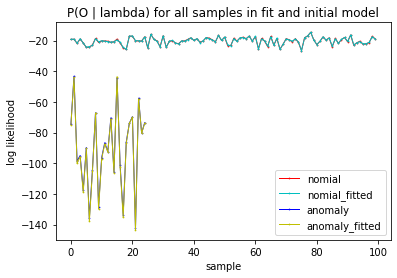

In [17]:
plt.plot(score_nomial[:], ".-", label="nomial", color = 'r', linewidth = 1, markersize = 1.5)
plt.plot(score_nomial_fit[:], ".-", label="nomial_fitted", color = 'c', linewidth = 1, markersize = 1.5)
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'b', linewidth = 1, markersize = 1.5)
plt.plot(score_anomaly_fit[:], ".-", label="anomaly_fitted", color = 'y', linewidth = 1, markersize = 1.5)
#plt.plot(score_nomial[:] - score_nomial_fit[:], ".-", label="nomial_difference", 
#color = 'm', linewidth = 1, markersize = 1.5)
#plt.plot(score_anomaly[:] - score_anomaly_fit[:], ".-", label="anoamly_difference", 
#color = 'g', linewidth = 1, markersize = 1.5)
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O | lambda) for all samples in fit and initial model")
plt.legend()
plt.show

<BarContainer object of 3 artists>

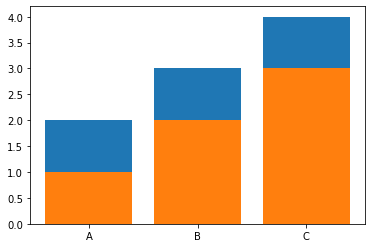

In [22]:
A = ["A","B","C"]
B = [2,3,4]
C = [1,2,3]
plt.bar(A, B)
plt.bar(A, C)

In [6]:
X_test_label_nomial

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [104]:
import sys
#Deyang path
sys.path.insert(0, 'C:\code\HMM_Anomaly_Detection_Python\script')
import DataTypeConverter as dc
print(dc.Dec2bin(1.5,4,2))

ModuleNotFoundError: No module named 'DataTypeConverter'

In [105]:
import sys
#Tiancheng path
sys.path.insert(0, '/Users/yang/Desktop/IL2232/MyCode/PythonVersionHMM/script')
import DataTypeConverter as dc
print(dc.Dec2bin(0.08642578125,32,29))
print(dc.Dec2hex(0.08642578125,16,13))
print(dc.Dec2hex(0.078125,32,29))
print(dc.Dec2hex(0.0546875,16,13))
print(dc.Dec2hex(0.0263671875,16,13))
print(dc.Dec2hex(0.0600585938,16,13))

print("0.5 = ", dc.Dec2hex(0.5, 16, 13))
print("0.25 = ", dc.Dec2hex(0.25, 16, 13))
print("0.75 = ", dc.Dec2hex(0.75, 16, 13))
print("1 = ", dc.Dec2hex(1, 16, 13))

00000010110001000000000000000000
0x2c4
0x2800000
0x1c0
0xd8
0x1ec
0.5 =  0x1000
0.25 =  0x800
0.75 =  0x1800
1 =  0x2000


In [169]:
for row in X_test_data_nomial:
    for ele in row:
        print(dc.Dec2hex(ele, 64, 32, "signed"))

0x2a56d6c2
0xffffffffddbb7428
0x8d3983ec
0xffffffffc3b5e3e2
0xffffffffebe5f674
0x22f763d34
0x6362f03c
0xffffffffca10cf22
0x7e133dfd
0x51081603
0x1a7ee196a
0x208bb808f
0x4f21249e
0x59f44931
0x21f7481b2
0x1f4b894d3
0x7c1b2a8
0x1f88f0f03
0x2c339ed9
0x1f21f0571
0x1f7e9508c
0xffffffffe87f8935
0x59837a22
0xffffffff909212c9
0x227ce4c58


In [135]:
for row in X_test_data_anomaly:
    for ele in row:
        print(dc.Dec2hex(ele, 32, 29, "signed"))

0x14fdc32d
0x21177011
0x9e42493
0xb3e8926
0x23ee9036
0x1ebee03b
0x579ff40
0x10212cc8
0xf81e34d3
0xf78b30fd
0x25eec7a6
0xc6c5e07
0xf94219e5
0xfc267bf
0xa2102c0
0xfbf3f701
0x3dfdf0c
0x4a21467
0xfe8c1e70
0xb48195d
0x19b85d08
0x267ba69c
0x1f52602
0xfb40d7d9
0xf62deee1
0x4b09775
0xfca9e13e
0xfdb3fed2
0xd82c275
0x55934e2
0x277ad7d0
0xb5a4728
0x147c3251
0x1a9eacf3
0xf9f9072a
0xe9d90476
0xf67f08d1
0x147193b7
0xfc900cbf
0x6738551
0x1c3a1d8e
0xf490f530
0xaee4dd3
0x19a9f5c
0xfa1bb2b6
0xfef6b6d4
0xf4eac7b3
0x32f9741
0xfe3feaed
0x18f2d078


In [153]:
score_nomial

array([-3.49006229, -3.67930201, -4.12786317, -1.59050116, -2.96287286])

In [154]:
score_anomaly

array([-20.456497  ,  -8.71205169, -12.50313407, -13.90227953,
        -8.60438947])

[[ 0.16538756]
 [-0.13385843]
 [ 0.55165886]
 [-0.23550583]
 [-0.0785223 ]]
[[ 2.18539794]
 [ 0.38822843]
 [-0.21068101]
 [ 0.49248111]
 [ 0.31652963]]
[[1.65597686]
 [2.03411106]
 [0.30909947]
 [0.35138376]
 [2.1228715 ]]
[[1.95594149]
 [0.03029935]
 [1.9709329 ]
 [0.17266267]
 [1.94578585]]
[[ 1.96840385]
 [-0.09180396]
 [ 0.34966243]
 [-0.4352711 ]
 [ 2.15549161]]


<function matplotlib.pyplot.show(close=None, block=None)>

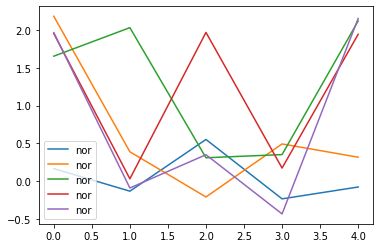

In [173]:
for row in X_test_data_nomial:
    plt.plot(row, label = "nor")
    print(row)
plt.legend()
plt.show

[[0.65597686]
 [1.03411106]
 [0.30909947]
 [0.35138376]
 [1.1228715 ]]
[[ 1.18539794]
 [ 0.38822843]
 [-0.21068101]
 [ 0.49248111]
 [ 0.31652963]]
[[ 0.8037553 ]
 [ 1.2025941 ]
 [ 0.06117535]
 [-0.14833458]
 [-0.30689293]]
[[ 1.23374549]
 [ 0.35477026]
 [ 0.64016071]
 [ 0.83186958]
 [-0.18835108]]
[[ 0.88209417]
 [-0.35730496]
 [ 0.34158985]
 [ 0.05012482]
 [-0.18411889]]


<function matplotlib.pyplot.show(close=None, block=None)>

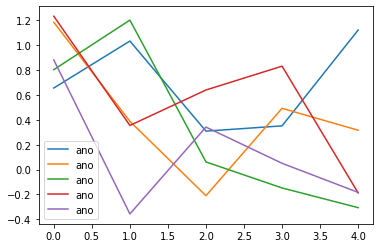

In [172]:
for row in X_test_data_anomaly:
    plt.plot(row, label = "ano")
plt.legend()
plt.show

In [163]:
print(dc.Dec2hex(0.75, 64, 32, "signed"))
print(dc.Dec2hex(0.25, 64, 32, "signed"))
print(dc.Dec2hex(0.0625, 64, 32, "signed"))
print(dc.Dec2hex(0.5, 64, 32, "signed"))
print(dc.Dec2hex(2, 64, 32, "signed"))
print(dc.Dec2hex(16, 64, 32, "signed"))

0xc0000000
0x40000000
0x10000000
0x80000000
0x200000000
0x1000000000


In [167]:
dc.Hex2dec("0x3d6c008", 32, "signed")

0.014995576813817024

In [168]:
dc.Dec2hex(0.006737946999, 64, 32, "signed")

'0x1b993fe'

In [171]:
dc.Hex2dec("0x1d5a9293e0", 32, "signed")

29.35379909723997